# Chapiter I : Exploratory Data Analysis

## 1) Package versions verification  

In [2]:
# python version
import sys
sys.version

'3.10.15 (main, Oct  3 2024, 07:27:34) [GCC 11.2.0]'

## 2) Data import

In [3]:
# Library import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#default directory
import os
#os.chdir()

#data import
import pandas as pd
data = pd.read_csv("dataset/water_potability.csv")
new_data = data.copy()
new_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## 3) Basic analysis

In [5]:
# Data informations
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
# COunting the number of each type of the variables
new_data.dtypes.value_counts()

float64    9
int64      1
Name: count, dtype: int64

In [7]:
# Data summary
new_data.describe(include='all')

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
# Class distribution of the feature variable
new_data['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [9]:
# check missing values
new_data.isnull().sum()/new_data.shape[0]

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

## 4) Visualization

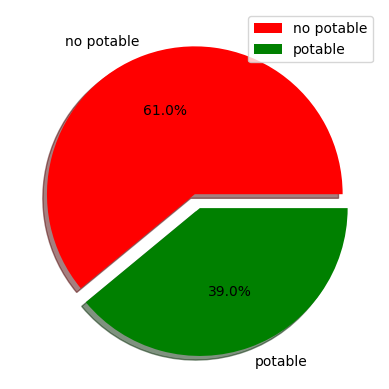

In [10]:
# Feature variables visualization
potability=new_data['Potability'].value_counts(normalize=True)*100
plt.pie(potability, 
        labels=['no potable', 'potable'],
        colors = ['red', 'green'],
        explode = [0, 0.1],
        autopct = '%1.1f%%',
        shadow = True)
plt.legend()

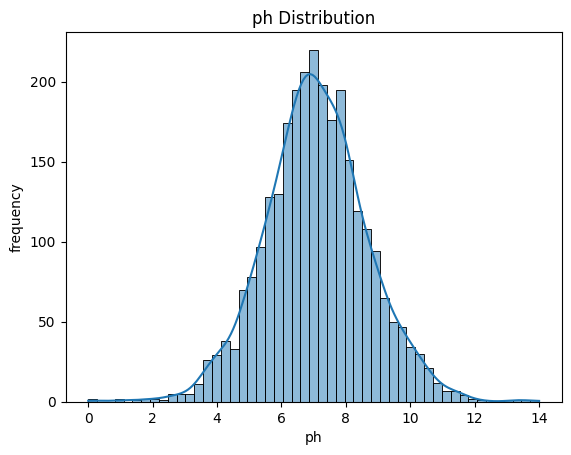

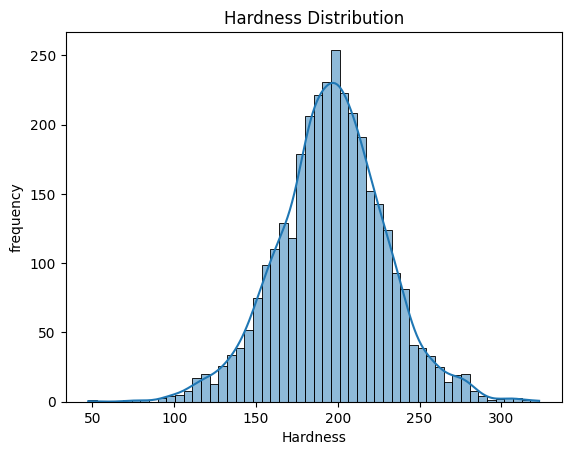

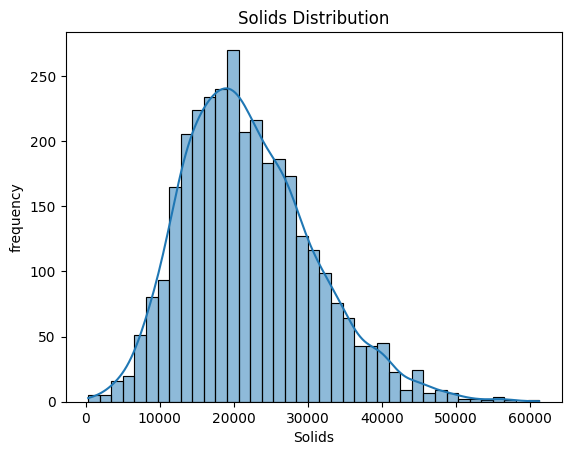

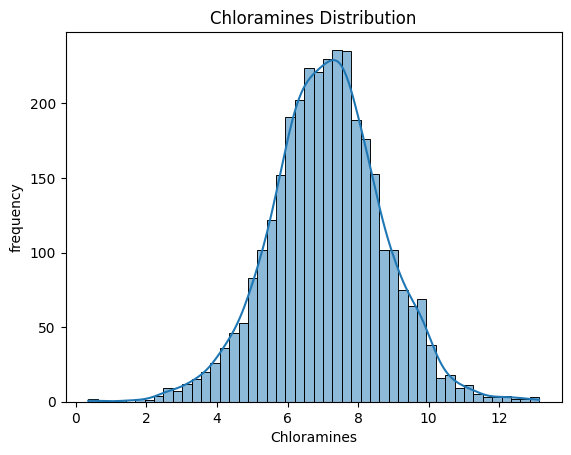

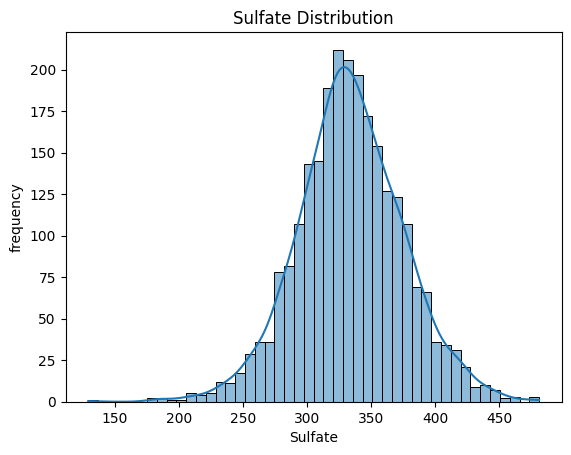

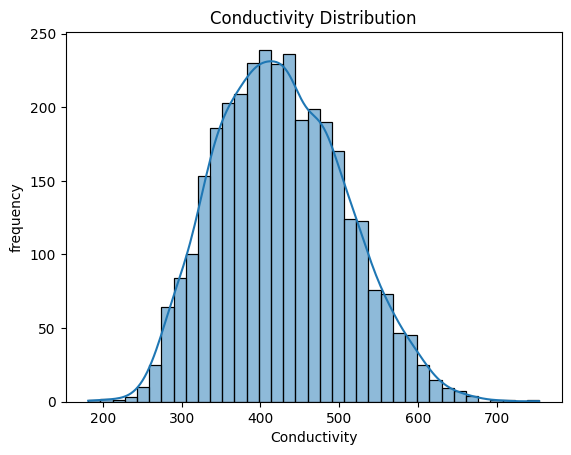

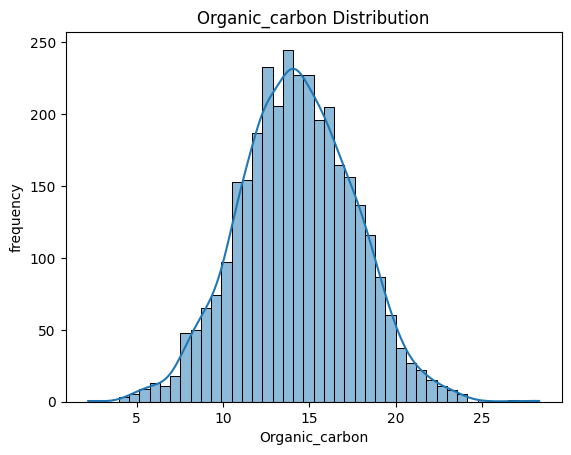

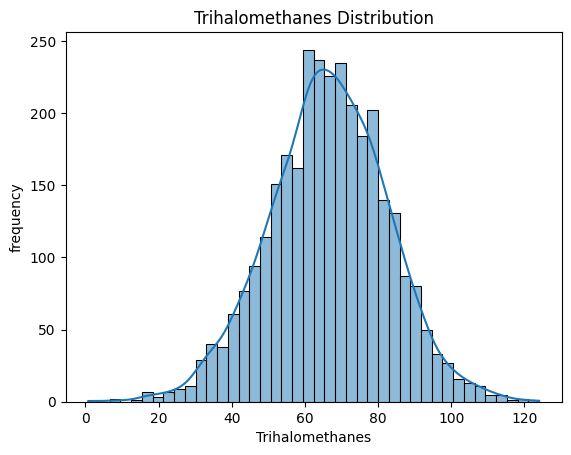

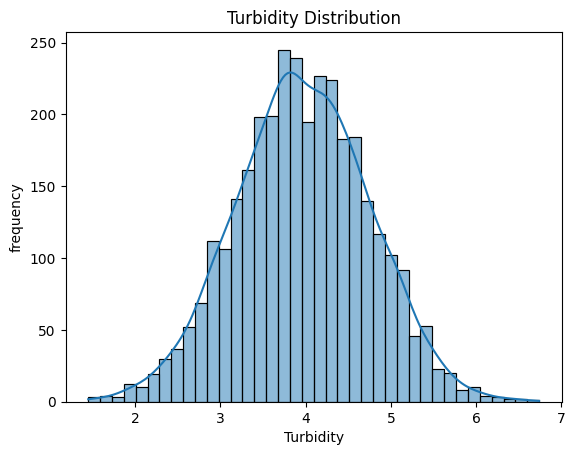

In [11]:
#Visualization of the quantitative variable
for col in new_data.columns:
    if new_data[col].dtypes==float:
        plt.figure()
        sns.histplot(new_data[col],kde=True)
        plt.title('{} Distribution'.format(col))
        plt.xlabel(col)
        plt.ylabel('frequency')

In [12]:
#RELATION BETWEEN OF THE VARIABLE FEATURES
#Correlation matrix of the features variables
data_corr=new_data.corr()
data_corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

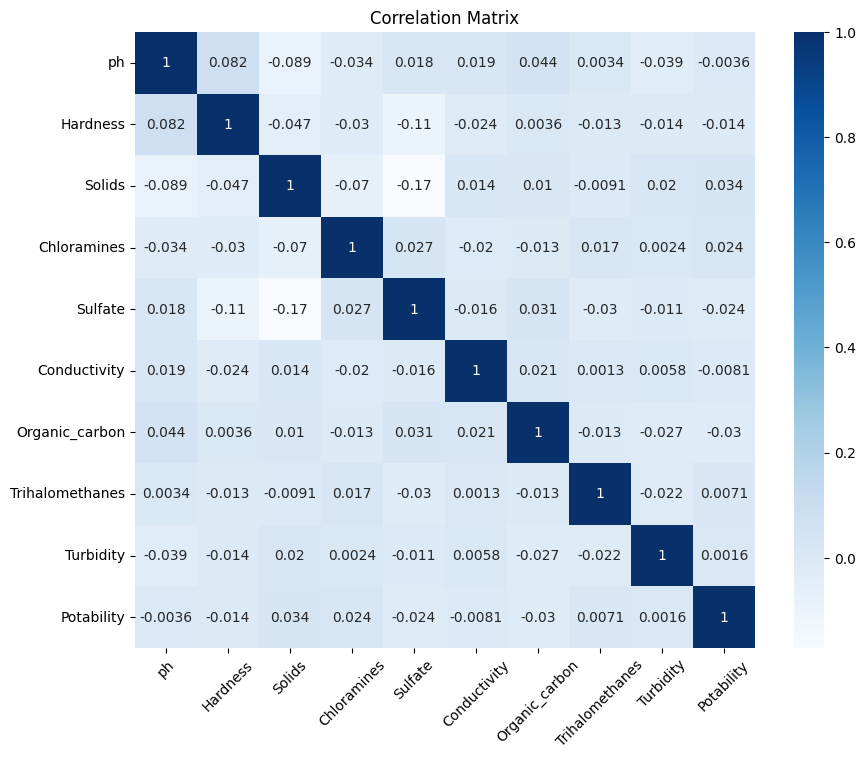

In [13]:
#Correlation matrix visualisation
plt.figure(figsize=(10,8))
sns.heatmap(data_corr, cmap='Blues',annot=True)
plt.xticks(rotation=45)
plt.title('Correlation Matrix')

In [14]:
#RELATION BETWEEN OF THE VARIABLE FEATURES AND THE VARIABLE TARGET
print(new_data.groupby('Potability').count())
print(new_data.groupby('Potability').min())
print(new_data.groupby('Potability').mean())
print(new_data.groupby('Potability').max())
print(new_data.groupby('Potability').std())

              ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
Potability                                                               
0           1684      1998    1998         1998     1510          1998   
1           1101      1278    1278         1278      985          1278   

            Organic_carbon  Trihalomethanes  Turbidity  
Potability                                              
0                     1998             1891       1998  
1                     1278             1223       1278  
                  ph   Hardness      Solids  Chloramines     Sulfate  \
Potability                                                             
0           0.000000  98.452931  320.942611     1.683993  203.444521   
1           0.227499  47.432000  728.750830     0.352000  129.000000   

            Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
Potability                                                            
0             181.483754        4.371899    

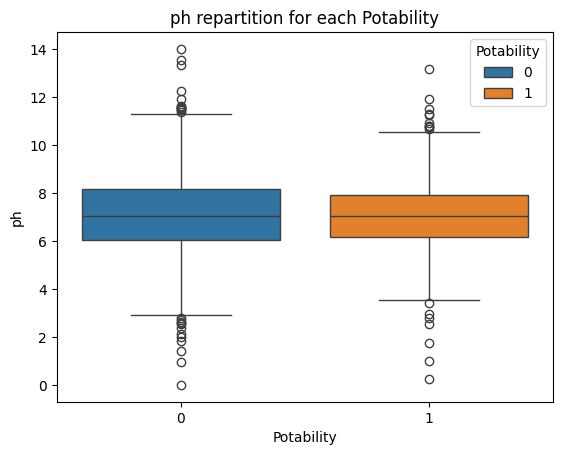

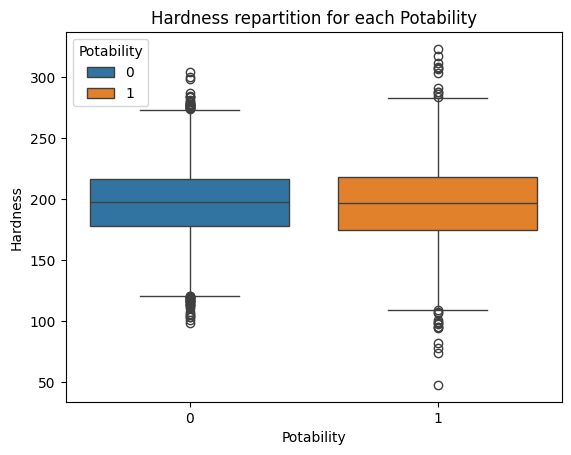

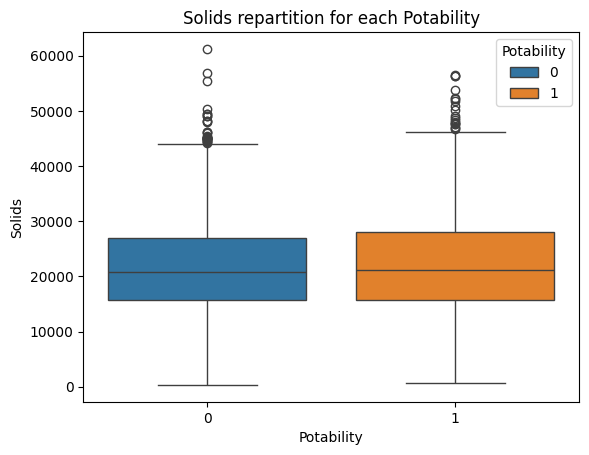

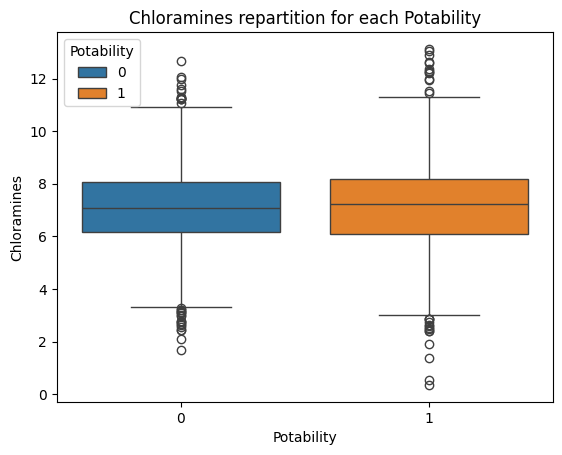

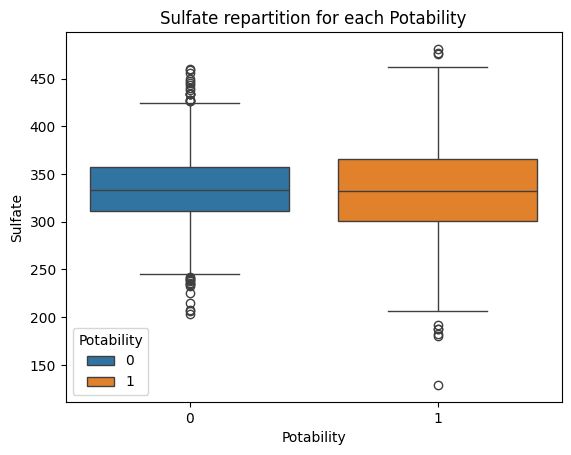

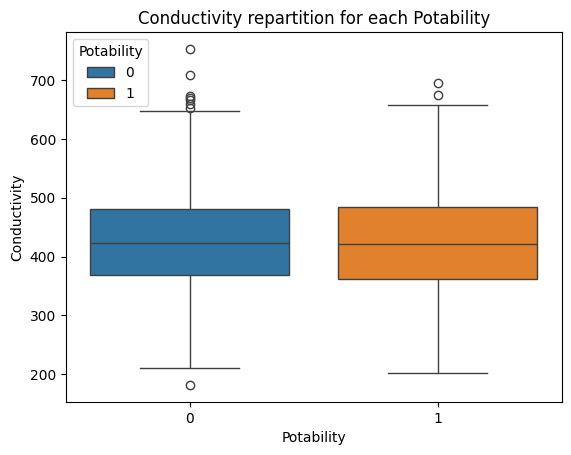

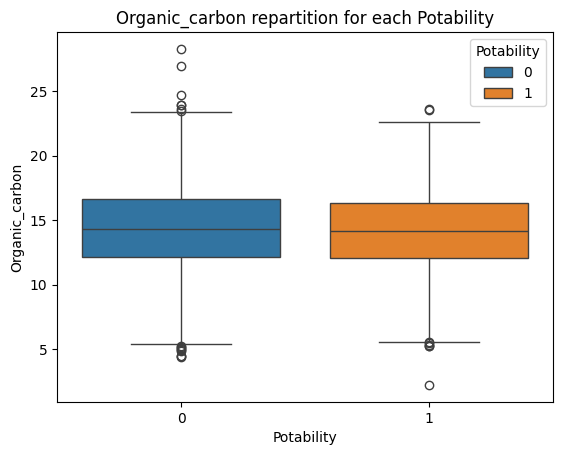

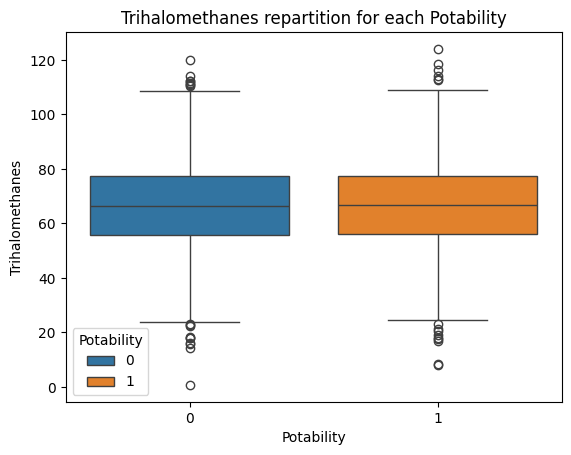

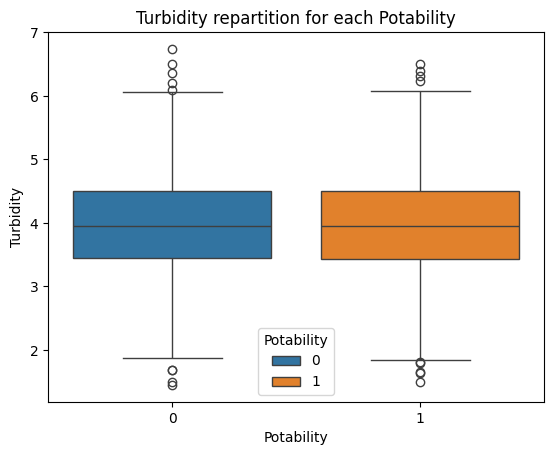

In [15]:
#Visualization
for col in new_data.columns:
    if col!='Potability':
        plt.figure()
        sns.boxplot(new_data,x='Potability', y=col, hue="Potability")
        plt.title("{} repartition for each Potability".format(col))

# Chapiter II : Preprocessing

In [16]:
# Loading data
df = data.copy()

In [17]:
# Function for droping the outlier values
def outliers_cleaning(data):
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data_cleaned

In [18]:
# Function for droping the missing values
def nan_cleaning(data):
    return data.dropna(axis=0)

In [19]:
# Function for encoding the categorical variables
def encoding(data):
    for col in data.columns:
        if data.dtypes == 'Obj':
            data[col] = data[col].astype('category').cat.codes
    return data

In [20]:
# Function for the imputation
from sklearn.impute import SimpleImputer, KNNImputer

def imputation(imputation_method):
    if imputation_method==KNNImputer():
        imputer=KNNImputer(n_neighbors=1)
    else:
        imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
    return imputer

In [21]:
# Functioin for the standardization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

def standardization():
    return StandardScaler()

In [22]:
# Function fo the polynomial features
def polynomialFeatures(n):
    return PolynomialFeatures(n, include_bias=False)

In [23]:
# Function for the feature selections
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold

feature_selection = VarianceThreshold(threshold=0.1)

In [24]:
# Data cleaning
#df = nan_cleaning(df)
#df = outliers_cleaning(df)

In [25]:
# Data divided
from sklearn.model_selection import train_test_split

def X_y_data(data, target_variable):
    X=data.drop(target_variable, axis=1)
    y=data[target_variable]
    return X, y

trainset, testset = train_test_split(df , test_size=0.2, random_state=0)

X_train, y_train = X_y_data(trainset, 'Potability')
X_test, y_test = X_y_data(testset, 'Potability')

#Checking the proportion of classes in the target variable after imputation
print(y_train.value_counts(normalize= True))
print(y_test.value_counts(normalize= True))

Potability
0    0.605344
1    0.394656
Name: proportion, dtype: float64
Potability
0    0.628049
1    0.371951
Name: proportion, dtype: float64


In [26]:
# preprocessor pipeline
from sklearn.pipeline import make_pipeline

preprocessor = make_pipeline(feature_selection, imputation(SimpleImputer()), polynomialFeatures(3))

## Chapiter III : Build model

### Preparation

In [27]:
# Import library for the modelling
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA

In [28]:
# Pipeline transformation during modelling
lr= make_pipeline(preprocessor, standardization(), LogisticRegression(dual=False, max_iter=10000))
ridge = make_pipeline(preprocessor, standardization(), RidgeClassifier())
sgd = make_pipeline(preprocessor, standardization(), SGDClassifier())
svm= make_pipeline(preprocessor, standardization(), SVC(random_state=0))
linSVC= make_pipeline(preprocessor, standardization(), LinearSVC(dual=False, max_iter=10000))
knn= make_pipeline(preprocessor, standardization(), KNeighborsClassifier())
random= make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
et= make_pipeline(preprocessor, ExtraTreesClassifier(random_state=0))
dt= make_pipeline(preprocessor,  DecisionTreeClassifier(random_state=0))
nb= make_pipeline(preprocessor,standardization(),  GaussianNB())
lda= make_pipeline(preprocessor, standardization(), LinearDiscriminantAnalysis())
qda= make_pipeline(preprocessor, standardization(), PCA(n_components=0.95), QuadraticDiscriminantAnalysis())

In [29]:
# Model list
list_of_models= {'LinearRegression': lr,
                 'Ridge' : ridge,
                 'SGD' : sgd,
                 'SVM': svm,
                 'LinSVM' :linSVC,
                 'KNeighbors': knn,
                 'RandomForest': random,
                 'ExtraTrees': et,
                 'DecisionTree': dt,
                 'NaiveBayes': nb,
                 'LinDiscriminantAnalysis': lda,
                 'QuadraDiscriminantAnalysis': qda}

In [30]:
# Function for evaluation of the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV, learning_curve

def evaluation(model):
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print("CONFUSION MATRIX :")
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print('CLASSIFICATION REPORT :')
    print(classification_report(y_test, y_pred))
    print('\n')
    print('LEARNING CURVE :')
    N, train_score, val_score= learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.2,1,10), scoring='f1', cv=5)
    plt.figure(figsize=(8,6))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.show()

### Modelling and Evaluation

CONFUSION MATRIX :
[[374  38]
 [163  81]]


CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       0.70      0.91      0.79       412
           1       0.68      0.33      0.45       244

    accuracy                           0.69       656
   macro avg       0.69      0.62      0.62       656
weighted avg       0.69      0.69      0.66       656



LEARNING CURVE :


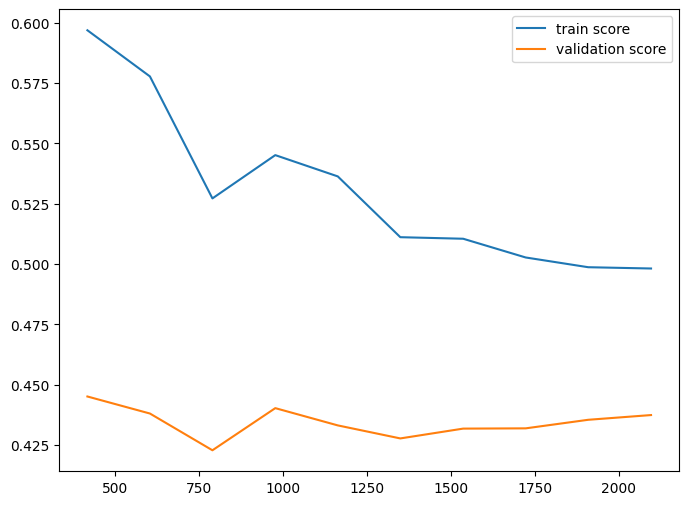

In [31]:
# Model for tuning the data
evaluation(lr)

LinearRegression
CONFUSION MATRIX :
[[374  38]
 [163  81]]


CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       0.70      0.91      0.79       412
           1       0.68      0.33      0.45       244

    accuracy                           0.69       656
   macro avg       0.69      0.62      0.62       656
weighted avg       0.69      0.69      0.66       656



LEARNING CURVE :


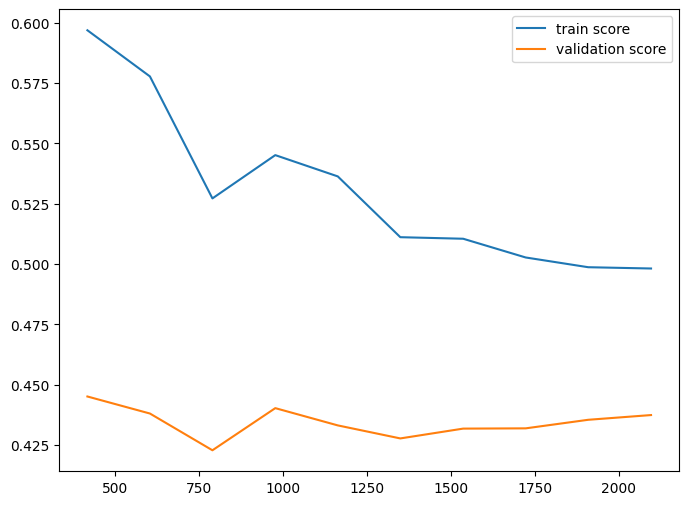

Ridge
CONFUSION MATRIX :
[[376  36]
 [171  73]]


CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       0.69      0.91      0.78       412
           1       0.67      0.30      0.41       244

    accuracy                           0.68       656
   macro avg       0.68      0.61      0.60       656
weighted avg       0.68      0.68      0.65       656



LEARNING CURVE :


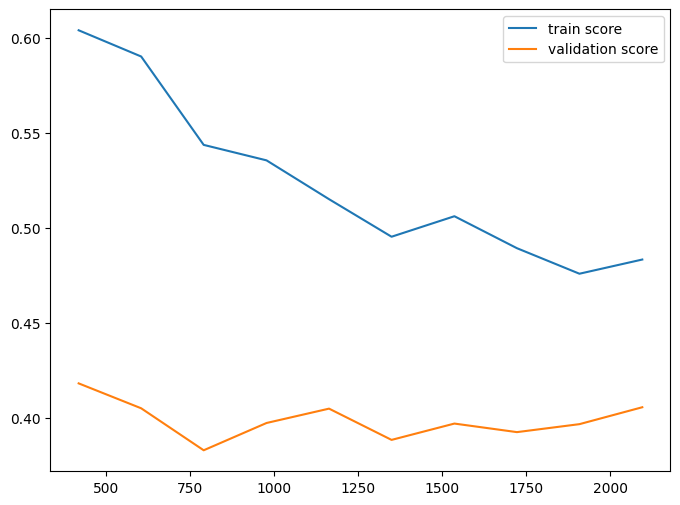

SGD
CONFUSION MATRIX :
[[274 138]
 [124 120]]


CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       412
           1       0.47      0.49      0.48       244

    accuracy                           0.60       656
   macro avg       0.58      0.58      0.58       656
weighted avg       0.61      0.60      0.60       656



LEARNING CURVE :


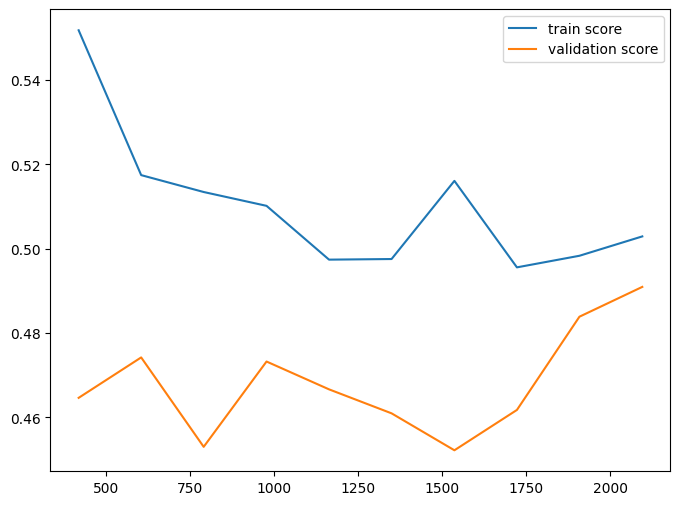

SVM
CONFUSION MATRIX :
[[387  25]
 [181  63]]


CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       0.68      0.94      0.79       412
           1       0.72      0.26      0.38       244

    accuracy                           0.69       656
   macro avg       0.70      0.60      0.58       656
weighted avg       0.69      0.69      0.64       656



LEARNING CURVE :


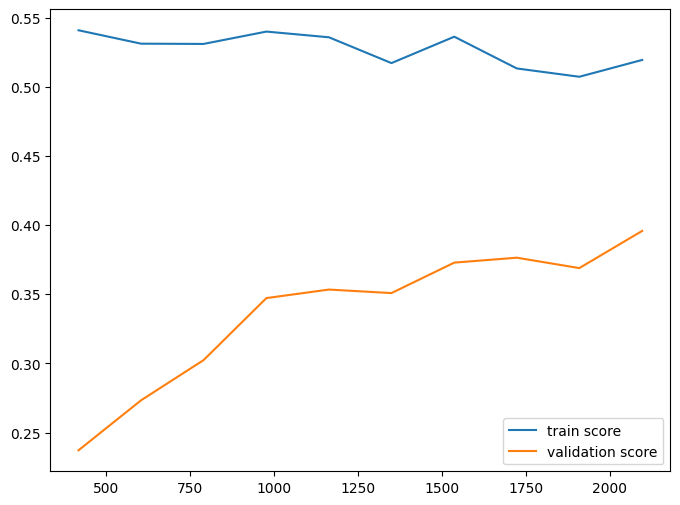

LinSVM
CONFUSION MATRIX :
[[370  42]
 [163  81]]


CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       0.69      0.90      0.78       412
           1       0.66      0.33      0.44       244

    accuracy                           0.69       656
   macro avg       0.68      0.62      0.61       656
weighted avg       0.68      0.69      0.66       656



LEARNING CURVE :


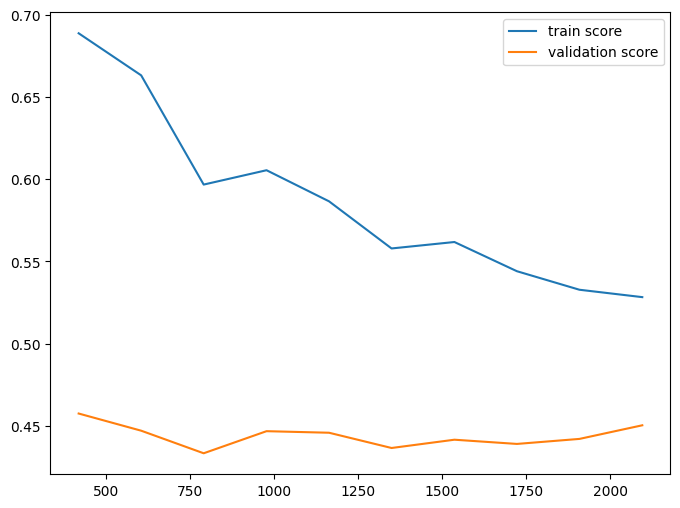

KNeighbors
CONFUSION MATRIX :
[[315  97]
 [153  91]]


CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       0.67      0.76      0.72       412
           1       0.48      0.37      0.42       244

    accuracy                           0.62       656
   macro avg       0.58      0.57      0.57       656
weighted avg       0.60      0.62      0.61       656



LEARNING CURVE :


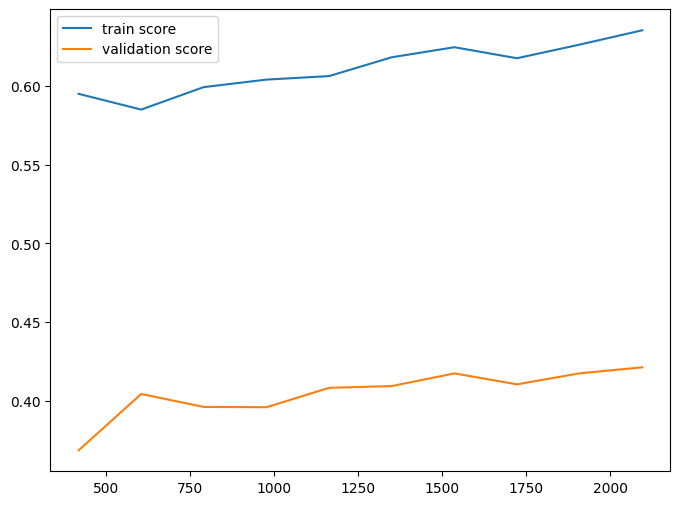

RandomForest
CONFUSION MATRIX :
[[364  48]
 [152  92]]


CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       0.71      0.88      0.78       412
           1       0.66      0.38      0.48       244

    accuracy                           0.70       656
   macro avg       0.68      0.63      0.63       656
weighted avg       0.69      0.70      0.67       656



LEARNING CURVE :


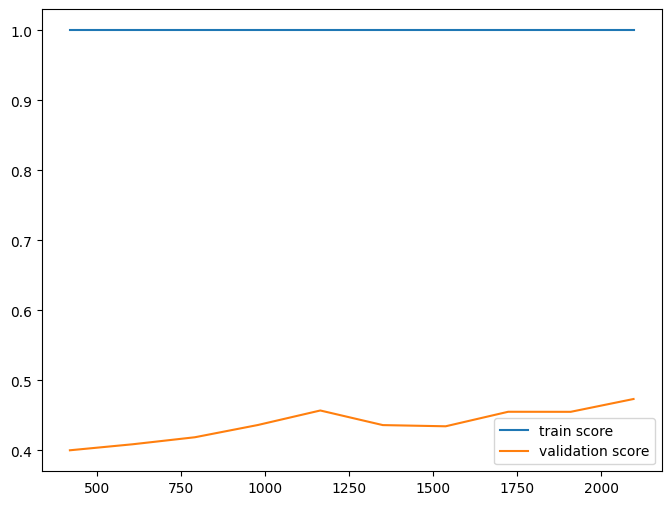

ExtraTrees
CONFUSION MATRIX :
[[367  45]
 [162  82]]


CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       0.69      0.89      0.78       412
           1       0.65      0.34      0.44       244

    accuracy                           0.68       656
   macro avg       0.67      0.61      0.61       656
weighted avg       0.68      0.68      0.65       656



LEARNING CURVE :


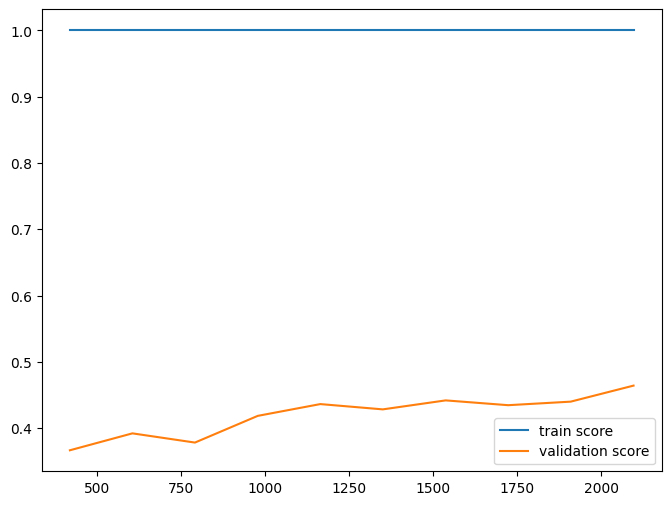

DecisionTree
CONFUSION MATRIX :
[[253 159]
 [135 109]]


CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       412
           1       0.41      0.45      0.43       244

    accuracy                           0.55       656
   macro avg       0.53      0.53      0.53       656
weighted avg       0.56      0.55      0.56       656



LEARNING CURVE :


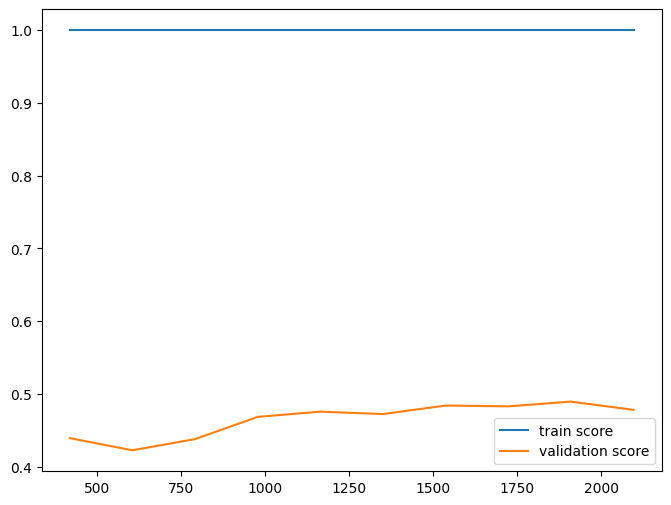

NaiveBayes
CONFUSION MATRIX :
[[295 117]
 [158  86]]


CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       0.65      0.72      0.68       412
           1       0.42      0.35      0.38       244

    accuracy                           0.58       656
   macro avg       0.54      0.53      0.53       656
weighted avg       0.57      0.58      0.57       656



LEARNING CURVE :


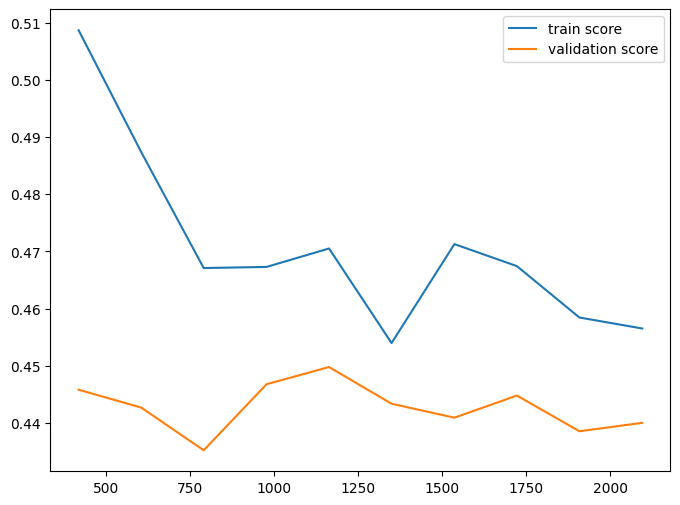

LinDiscriminantAnalysis
CONFUSION MATRIX :
[[362  50]
 [168  76]]


CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       412
           1       0.60      0.31      0.41       244

    accuracy                           0.67       656
   macro avg       0.64      0.60      0.59       656
weighted avg       0.65      0.67      0.64       656



LEARNING CURVE :


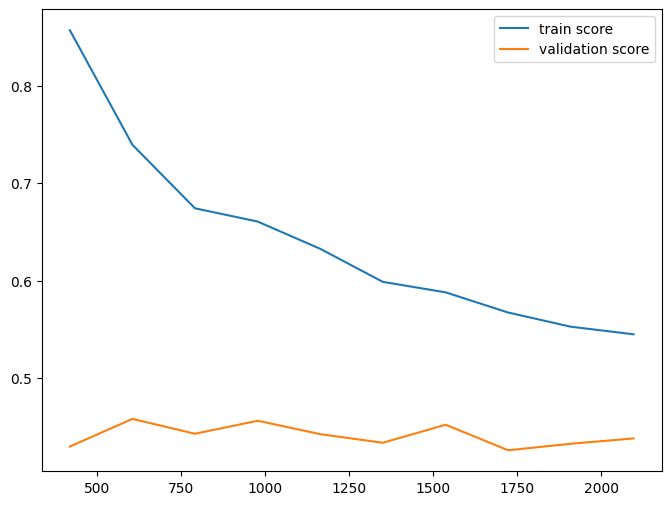

QuadraDiscriminantAnalysis
CONFUSION MATRIX :
[[373  39]
 [167  77]]


CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       0.69      0.91      0.78       412
           1       0.66      0.32      0.43       244

    accuracy                           0.69       656
   macro avg       0.68      0.61      0.61       656
weighted avg       0.68      0.69      0.65       656



LEARNING CURVE :


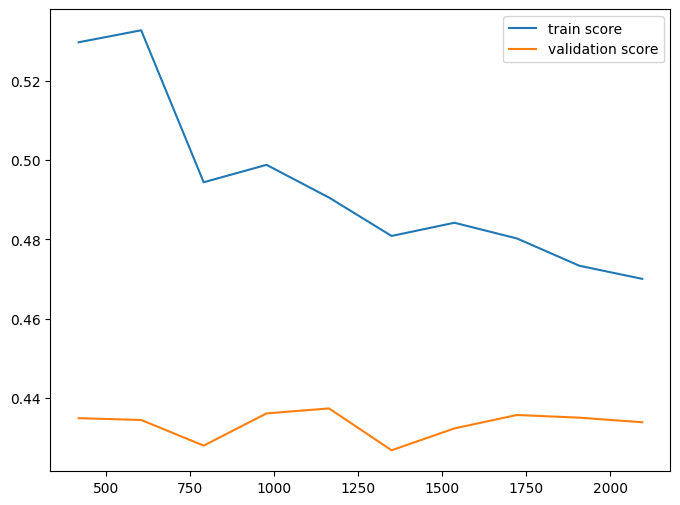

In [32]:
# Modelling and Evaluation of all selected model
for name, model in list_of_models.items():
    print(name)
    evaluation(model)

### Optimization

In [33]:
# Show all hyper-parameters of the best model
import sklearn
sklearn.set_config(print_changed_only=False) 
random

Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('variancethreshold',
                                  VarianceThreshold(threshold=0.1)),
                                 ('simpleimputer',
                                  SimpleImputer(add_indicator=False, copy=True,
                                                fill_value=None,
                                                keep_empty_features=False,
                                                missing_values=nan,
                                                strategy='mean')),
                                 ('polynomialfeatures',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=False,
                                                     interaction_only=F...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=None, oob_score=False,
                                        random_state=0, verbose=0,
                                        warm_start=False))],
         verbose=False)

In [34]:
# Optimization of this model using GridSearchCV
hyper_params={'pipeline__polynomialfeatures__degree': [2,3,4],
              'randomforestclassifier__max_depth': [10, 20, 30],
              'randomforestclassifier__n_estimators': [100, 200, 300]}
model=GridSearchCV(random, hyper_params, scoring='f1', cv=5)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('BEST PARAMETERS : ')
print(model.best_params_)
print('\n')
print('CLASSIFICATION REPORT')
print(classification_report(y_test, y_pred))

BEST PARAMETERS : 
{'pipeline__polynomialfeatures__degree': 4, 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 100}


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.70      0.87      0.77       412
           1       0.62      0.36      0.46       244

    accuracy                           0.68       656
   macro avg       0.66      0.61      0.61       656
weighted avg       0.67      0.68      0.66       656



### Saving the best model

In [36]:
import joblib
joblib.dump(random, 'potability_model.pkl')

['potability_model.pkl']